# SVM 1 2    FilterPercentil80_20

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

seed=2020

In [2]:
# Loading dataframes for 1 and 2 occupants
filePath = '/'
df1 = pd.read_csv(filePath + '.csv', index_col=0).drop('0',axis=1)
df2 = pd.read_csv(filePath + '.csv', index_col=0).drop('0',axis=1)

df = pd.concat([df1, df2])
df = df.reset_index()

# Drop data with missing values
df = df.loc[df.iloc[:, 22:].dropna().index]
print(df.shape)
# Resample dataframe
resample_value = df['Number of Occupants'].value_counts().min()
df = pd.concat([
    df[df['Number of Occupants'] == 1].sample(resample_value,random_state=seed),
    df[df['Number of Occupants'] == 2].sample(resample_value,random_state=seed)
])
df = df.sample(frac=1,random_state=seed).reset_index(drop=True)
print(df.shape)
# Split into X and y
X = df.iloc[:, 22:]
y = df['Number of Occupants']

# Processing
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

(1152, 2038)
(1152, 2038)


In [4]:
# Spliting testing and training set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,shuffle=True, random_state=seed)

In [7]:
#I vary the parameters 'kernel': ['rbf','sigmoid','poly','linear'], 'gamma' : [1e-4,1e-3,1e-2,1e-1], 'C' : [1,10,100]
kf = KFold(n_splits=n_splits,shuffle=True, random_state=seed)
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2],
        'C' : [1,10]
    }
]
'''

    {
        'kernel': ['sigmoid'],
         'C' : [1,10,100]
    },
    
    
 ,  
    {
         'kernel': ['poly'],
         'C' : [1,10,100,1000]
    }
    ,
    {

        'kernel': ['linear'],
        'C' : [1,10,100,1000]
    } 
]
'''
clf = GridSearchCV(SVC(decision_function_shape='ovo'), param_grid=parameters, cv=kf)
clf.fit(X=X, y=y)
clf.best_params_


{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

# With cross validation

Accuracy: 0.69 (+/- 0.03)


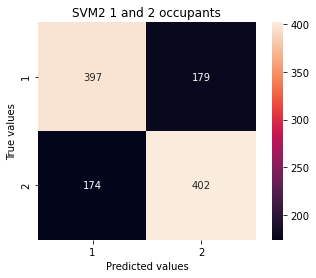

In [9]:
#I use the parameters that I obtained before, to train and test the final model with kfold
n_splits=5
model=SVC(kernel='rbf',C=1,decision_function_shape='ovo',gamma=0.0001)
kf = KFold(n_splits=n_splits,shuffle=True, random_state=seed)
scores = cross_val_score(model, X, y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#---------------------------------------------------------------------
y_pred_cv = cross_val_predict(model,X,y,cv=kf)
matrix = pd.DataFrame(
    confusion_matrix(y, y_pred_cv), 
    columns=range(1, y.max()+1), 
    index=range(1, y.max()+1)
)
sns.heatmap(matrix, annot=True, fmt='.0f', square=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('SVM2 1 and 2 occupants')
plt.show()